# Notebook for exploring the Mississippi River tank data [Equilibrium]

## Getting setup

In [1]:
from math import nan
import numpy as np
import os as os
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib widget
%config InlineBackend.figure_format='retina' # hig-res plots for a Retina display
import datetime

plt.rcParams.update({'font.size': 9})
width = 3.
height = 2.33

Get the working directory and a list of folders that contain data by experiment

In [4]:
working = os.getcwd()
files = sorted(glob(working+"/Data_02_Equilibrium/*"))
for i in range(0,len(files)):
    print('Data directory:',files[i],'(index:',i,')')

Data directory: /Users/strom-adm/Documents/GitHub/Data-Abolfazli-et-al-Mississippi/Data_02_Equilibrium/Equilibrium_Data.csv (index: 0 )
Data directory: /Users/strom-adm/Documents/GitHub/Data-Abolfazli-et-al-Mississippi/Data_02_Equilibrium/MS_insitu_withG.csv (index: 1 )
Data directory: /Users/strom-adm/Documents/GitHub/Data-Abolfazli-et-al-Mississippi/Data_02_Equilibrium/d_mu_ASTM_seasalt.csv (index: 2 )
Data directory: /Users/strom-adm/Documents/GitHub/Data-Abolfazli-et-al-Mississippi/Data_02_Equilibrium/d_mu_GoM_water.csv (index: 3 )


## Load Data

In [5]:
# Choose the data file to load
j=0

# load and display the data
data = pd.read_csv(files[j])
display(data.head())

,Exp_num,Date,Season,Sample_Location,Tank,G_eq_Hz,Background_S_ppt,GoM_water_present,S_eq_ppt,Salt_added,...,C_end_NTU,C_eq_avg_NTU,C_eq_avg_mgL,C_eq_low_minus_mgL,C_eq_high_plus_mgL,C_int/C_end,Time_at_G_min,DC/Dt_NTU_min,Trust_factor,Notes
0,Exp01,6/26/20,Summer,South Pass 10,1,95,2.2,1,2.2,None,...,9.6,9.6,-8.18044,0.0,0.0,1.0,60,0.0,0.5,Hard to say there was equilibrium
1,Exp02,6/27/20,Summer,South Pass 05,1,95,0.0,0,0.0,None,...,22.6,22.6,26.70636,0.0,0.0,1.0,60,0.0,0.5,Equilibrium on breakup
2,Exp02,6/27/20,Summer,South Pass 05,1,50,0.0,0,5.0,TS,...,22.6,22.6,26.70636,0.0,0.0,1.0,110,0.0,0.5,Last segment
3,Exp03,6/28/20,Summer,GoM,1,95,14.6,1,14.6,None,...,18.0,18.0,14.36180,0.0,0.0,1.0,60,0.0,1.0,"Nice data, values from growth match those from..."
4,Exp03,6/28/20,Summer,GoM,1,50,14.6,1,14.6,None,...,18.0,18.0,14.36180,0.0,0.0,1.0,60,0.0,1.0,"Nice data, values from growth match those from..."


## Sort the data

In [6]:
trust_level = 0.5

# salt type datasets
GoM_yes  = data[(data['GoM_water_present'] == 1) & (data['Trust_factor'] >= trust_level)].copy()
GoM_no  = data[(data['GoM_water_present'] == 0) & (data['S_eq_ppt'] > 0) & (data['Trust_factor'] >= trust_level)].copy()
S0  = data[(data['S_eq_ppt'] == 0) & (data['Trust_factor'] >= trust_level)].copy()

# seasons datasets
summer_all = data[(data['Season'] == 'Summer') & (data['Trust_factor'] >= trust_level)].copy()
winter_all  = data[(data['Season'] == 'Winter') & (data['Trust_factor'] >= trust_level)].copy()

summer_fresh = data[(data['Season'] == 'Summer') & (data['S_eq_ppt'] == 0) & (data['Trust_factor'] >= trust_level)].copy()
winter_fresh  = data[(data['Season'] == 'Winter') & (data['S_eq_ppt'] == 0) & (data['Trust_factor'] >= trust_level)].copy()

summer_GoM = data[(data['Season'] == 'Summer') & (data['GoM_water_present'] == 1) & (data['Trust_factor'] >= trust_level)].copy()
winter_GoM  = data[(data['Season'] == 'Winter') & (data['GoM_water_present'] == 1) & (data['Trust_factor'] >= trust_level)].copy()

summer_GoM_no = data[(data['Season'] == 'Summer') & (data['GoM_water_present'] == 0) & (data['S_eq_ppt'] > 0)& (data['Trust_factor'] >= trust_level)].copy()
winter_GoM_no  = data[(data['Season'] == 'Winter') & (data['GoM_water_present'] == 0) & (data['S_eq_ppt'] > 0)& (data['Trust_factor'] >= trust_level)].copy()

## Plot example

### size vs G broken down by S

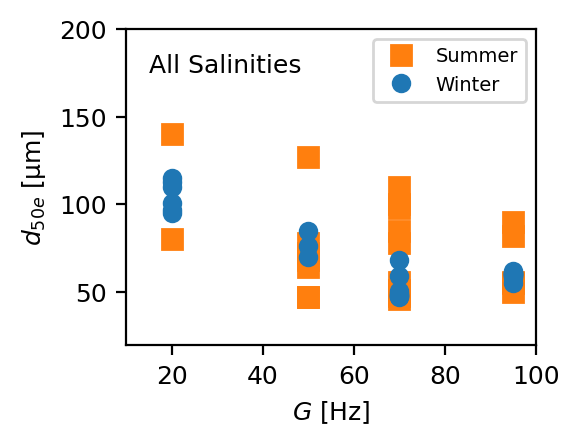

In [7]:
fig, ax = plt.subplots(figsize=(width,height))

ax.plot(summer_all['G_eq_Hz'], summer_all['d50_eq_um'],
        color='C1', marker='s', linestyle='none', ms = 7, alpha=1,  label='Summer')

ax.plot(winter_all['G_eq_Hz'], winter_all['d50_eq_um'],
        color='C0', marker='o', linestyle='none', alpha=1, label='Winter')

ax.text(15,175,'All Salinities', # backgroundcolor='white', 
        clip_on='True', multialignment='left', alpha=1) #weight = 'bold'


ax.set_xlabel('$G$ [Hz]')
ax.set_ylabel('$d_{50e}$ [µm]')
ax.set_xlim(10,100)
ax.set_ylim(20,200)
ax.legend(fontsize="7")
fig.tight_layout(); 

### d vs G by salt type

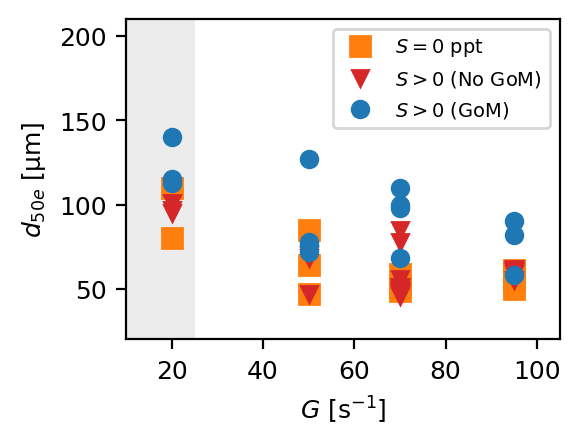

In [8]:
Gmin = 10
Gmax = 105
dmin = 20
dmax = 210

fig, ax = plt.subplots(figsize=(width,height))

ax.plot(S0['G_eq_Hz'], S0['d50_eq_um'],
        color='C1', marker='s', linestyle='none', ms = 7, alpha=1,  label='$S=0$ ppt')

ax.plot(GoM_no['G_eq_Hz'], GoM_no['d50_eq_um'],
        color='C3', marker='v', linestyle='none', alpha=1, label='$S>0$ (No GoM)')

ax.plot(GoM_yes['G_eq_Hz'], GoM_yes['d50_eq_um'],
        color='C0', marker='o', linestyle='none', alpha=1, label='$S>0$ (GoM)')

ax.axvspan(Gmin, 25, color='gray', alpha=0.15, lw=0)

ax.set_xlabel('$G$ [$\mathrm{s^{-1}}$]')
ax.set_ylabel('$d_{50e}$ [µm]')
ax.set_xlim(Gmin,Gmax)
ax.set_ylim(dmin,dmax)
ax.legend(fontsize="7")
fig.tight_layout();

### d vs C by different salinity

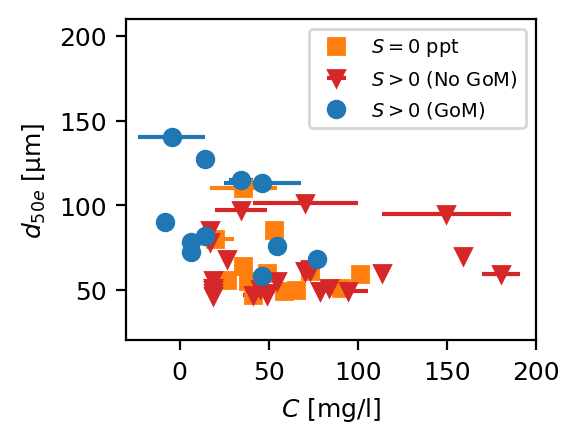

In [9]:
cmin = -30
cmax = 200
dmin = 20
dmax = 210

fig, ax = plt.subplots(figsize=(width,height))

ax.errorbar(S0['C_eq_avg_mgL'], S0['d50_eq_um'], 
            xerr=[S0.C_eq_low_minus_mgL,S0.C_eq_high_plus_mgL], fmt='s',color='C1',label='$S=0$ ppt')

ax.errorbar(GoM_no['C_eq_avg_mgL'], GoM_no['d50_eq_um'], 
            xerr=[GoM_no.C_eq_low_minus_mgL,GoM_no.C_eq_high_plus_mgL], fmt='v',color='C3',label='$S>0$ (No GoM)')

ax.errorbar(GoM_yes['C_eq_avg_mgL'], GoM_yes['d50_eq_um'], 
            xerr=[GoM_yes.C_eq_low_minus_mgL,GoM_yes.C_eq_high_plus_mgL], fmt='o',color='C0',label='$S>0$ (GoM)')

ax.set_xlabel('$C$ [mg/l]')
ax.set_ylabel('$d_{50e}$ [µm]')
ax.set_xlim(cmin,cmax)
ax.set_ylim(dmin,dmax)
ax.legend(fontsize="7")
fig.tight_layout(); 